# Quickstart Notebook
This notebook contains a quickstart guide to the **TTFEMesh** library.

For detailed information about the meaning of the tensorized Jacobians, Dirichlet masks, and concatenation maps,
we refer to the original paper [arXiv:1802.02839](https://arxiv.org/abs/1802.02839).

## Installation

```bash
pip install ttfemesh
```

# Creating a domain
We create a simple domain with two rectangles and an edge connecting them.
We set the Dirichlet boundary for the left side and the right side.

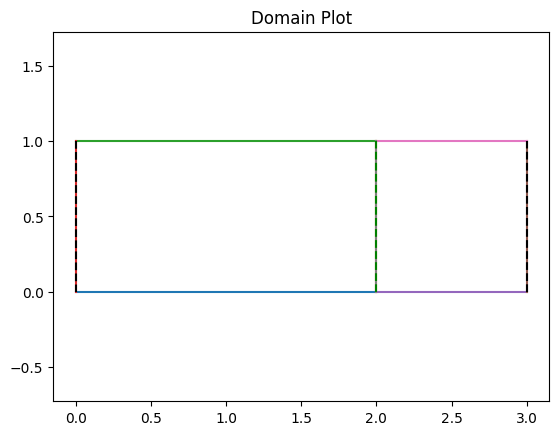

In [1]:
from ttfemesh.domain import RectangleFactory, CurveConnection2D, VertexConnection2D 
from ttfemesh.domain import DirichletBoundary2D, Domain2D

lower_left = (0, 0)
upper_right = (2, 1)
rectangle1 = RectangleFactory.create(lower_left, upper_right)

lower_left = (2, 0)
upper_right = (3, 1)
rectangle2 = RectangleFactory.create(lower_left, upper_right)

domain_idxs = [0, 1]
curve_idxs = [1, 3]
edge = CurveConnection2D(domain_idxs, curve_idxs)

bc = DirichletBoundary2D([(0, 3), (1, 1)])

domain = Domain2D([rectangle1, rectangle2], [edge], bc)
domain.plot()

# Meshing a Domain
Generating a mesh for a domain is straightforward.
It requires the domain, a quadrature rule and a mesh size exponent.
The mesh size exponent is used to control the size of the mesh, i.e.,
the number of discretization points in each direction will be $2^{n}$,
where $n$ is the mesh size exponent.

In [2]:
from ttfemesh.quadrature import GaussLegendre2D
from ttfemesh.mesh import DomainBilinearMesh2D

order = 1
qrule = GaussLegendre2D(order)
mesh_size_exponent = 3

mesh = DomainBilinearMesh2D(domain, qrule, mesh_size_exponent)
print(mesh)

DomainBilinearMesh2D(domain=Domain2D(2 subdomains, 1 connections), mesh_size_exponent=3, quadrature_rule=2D Gauss-Legendre Quadrature Rule (order=1), basis=TensorProductBasis(dim=2)::BilinearBasis)


# Retrieve Jacobians and Jacobians Determinants
For each of the subdomains, you can retrieve the tensorized Jacobians like so.

In [8]:
subdmesh = mesh.get_subdomain_mesh(0)
jac_tts = subdmesh.get_jacobian_tensor_trains()
print(jac_tts.shape)
print(jac_tts)

(1, 2, 2)
[[[TT with sizes and ranks:
   N = [4, 4, 4]
   R = [1, 2, 2, 1]

   Device: cpu, dtype: torch.float64
   #entries 32 compression 0.5       TT with sizes and ranks:
                                     N = [4, 4, 4]
                                     R = [1, 2, 2, 1]

                                     Device: cpu, dtype: torch.float64
                                     #entries 32 compression 0.5      ]
  [TT with sizes and ranks:
   N = [4, 4, 4]
   R = [1, 2, 2, 1]

   Device: cpu, dtype: torch.float64
   #entries 32 compression 0.5       TT with sizes and ranks:
                                     N = [4, 4, 4]
                                     R = [1, 2, 2, 1]

                                     Device: cpu, dtype: torch.float64
                                     #entries 32 compression 0.5      ]]]


In [9]:
jac_dets = subdmesh.get_jacobian_det_tensor_trains()
print(jac_dets.shape)
print(jac_dets)

(1,)
[TT with sizes and ranks:
 N = [4, 4, 4]
 R = [1, 2, 2, 1]

 Device: cpu, dtype: torch.float64
 #entries 32 compression 0.5      ]


In [10]:
jac_invdets = subdmesh.get_jacobian_invdet_tensor_trains()
print(jac_invdets.shape)
print(jac_invdets)

(1,)
[TT with sizes and ranks:
 N = [4, 4, 4]
 R = [1, 3, 4, 1]

 Device: cpu, dtype: torch.float64
 #entries 76 compression 1.1875   ]


# Retrieve Element to Global Index Map
You can retrieve the tensorized element to global index map like so.

In [11]:
element2global_map = mesh.get_element2global_index_map()
print(element2global_map.shape)
print(element2global_map)

(2, 2)
[[TT-matrix with sizes and ranks:
  M = [4, 4, 4]
  N = [4, 4, 4]
  R = [1, 4, 4, 1]
  Device: cpu, dtype: torch.float64
  #entries 384 compression 0.09375  TT-matrix with sizes and ranks:
                                    M = [4, 4, 4]
                                    N = [4, 4, 4]
                                    R = [1, 4, 4, 1]
                                    Device: cpu, dtype: torch.float64
                                    #entries 384 compression 0.09375 ]
 [TT-matrix with sizes and ranks:
  M = [4, 4, 4]
  N = [4, 4, 4]
  R = [1, 4, 4, 1]
  Device: cpu, dtype: torch.float64
  #entries 384 compression 0.09375  TT-matrix with sizes and ranks:
                                    M = [4, 4, 4]
                                    N = [4, 4, 4]
                                    R = [1, 4, 4, 1]
                                    Device: cpu, dtype: torch.float64
                                    #entries 384 compression 0.09375 ]]


# Retrieve Dirichlet Masks
For each of the subdomains, you can retrieve the tensorized Dirichlet masks like so.

In [12]:
masks = mesh.get_dirichlet_masks()
print(masks)

{0: TT with sizes and ranks:
N = [4, 4, 4]
R = [1, 2, 2, 1]

Device: cpu, dtype: torch.float64
#entries 32 compression 0.5
, 1: TT with sizes and ranks:
N = [4, 4, 4]
R = [1, 2, 2, 1]

Device: cpu, dtype: torch.float64
#entries 32 compression 0.5
}


# Retrieve Concatenation Maps
You can retrieve the concatenation maps for all pairs of connected subdomains like so.

In [13]:
concat_maps = mesh.get_concatenation_maps()
print(concat_maps)

{(0, 1): (TT-matrix with sizes and ranks:
M = [4, 4, 4]
N = [4, 4, 4]
R = [1, 1, 1, 1]
Device: cpu, dtype: torch.int64
#entries 48 compression 0.01171875
, TT-matrix with sizes and ranks:
M = [4, 4, 4]
N = [4, 4, 4]
R = [1, 1, 1, 1]
Device: cpu, dtype: torch.int64
#entries 48 compression 0.01171875
, TT-matrix with sizes and ranks:
M = [4, 4, 4]
N = [4, 4, 4]
R = [1, 1, 1, 1]
Device: cpu, dtype: torch.int64
#entries 48 compression 0.01171875
)}


# Curved Subdomains
**TTFEMesh** supports curved subdomains.

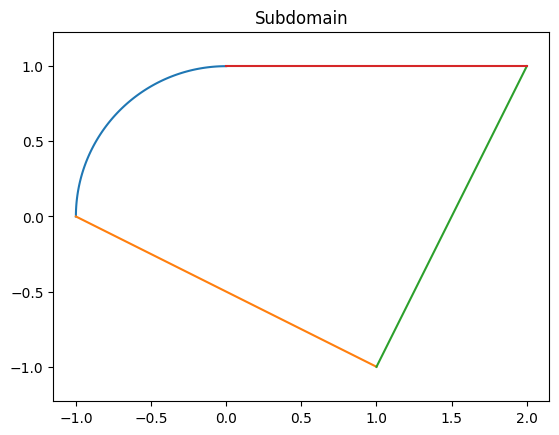

In [16]:
import numpy as np
from ttfemesh.domain import CircularArc2D, Line2D
from ttfemesh.domain import Subdomain2D

arc0 = CircularArc2D((0, 0), 1, np.pi/2., 0.5*np.pi)
line1 = Line2D((-1, 0), (1, -1))
line2 = Line2D((1, -1), (2, 1))
line3 = Line2D((2, 1), (0, 1))

subdomain = Subdomain2D([arc0, line1, line2, line3])
subdomain.plot()

# Further Documentation

For further documentation, please refer to the [API Reference](https://ttfemesh.readthedocs.io/en/latest/).